# Passo 1. Baixar os dados 

In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

In [2]:
# Carregando os dados
df = pd.read_csv("gym_churn_us.csv")

In [3]:
# ALterando o tipo de dado 
df['Month_to_end_contract'] = df['Month_to_end_contract'].astype(int)

In [4]:
# Transformando as colunas em minusculo 
df.columns = df.columns.str.lower()

In [5]:
# Analisando os dados 
df

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5,3,1.630108,1.596237,0


# Passo 2. Realize análise exploratória dos dados (EDA)


In [6]:
# Observando os tipos de dados 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int32  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [7]:
# Verificando se há valores ausentes 
df.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

Não foi localizado valores ausentes nos dados

In [8]:
# Obtendo as estatísticas descritivas dos dados
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Obs:
A média para a variável 'gender' é de 0,51 indicando uma distribuição quase equilibrada entre homens e mulheres no conjunto de dados.

A média para 'Near_Location' é 0,85 o que indica que a maioria dos clientes está localizada perto do estabelecimento.

A variável Partner tem uma média de 0,49 o que nós mostra que quase metade dos clientes tem um parceiro associado à conta.

'Promo_friends' tem uma média de 0,31, indicando que aproximadamente 31% dos clientes se inscreveram devido a promoções envolvendo amigos. Como essa porcentagem não é alta, podemos identificar um potencial futuro para programas de recomendação visando uma estratégia mais eficaz.

Com uma média de 0,90 para a variável 'Phone' a maioria dos clientes fornece seus números de telefone, facilitando a comunicação direta.

O 'Contract_period' varia de 1 a 12 meses, com uma média de 4,68 meses, podemos dizer que a maior partes dos clientes opta por contratos curtos.

A maioria dos clientes está na faixa etária dos 20 e 30 anos.

O tempo médio de permanência 'Lifetime' é de aproximadamente 3,72 meses, mostrando que a maioria dos clientes tem uma experiência relativamente curta, já a frequência média de aulas por mês 'Avg_class_frequency_total' é 1,88 mas varia bastante nós mostrando que alguns clientes utilizam mais os nossos serviços do que os outros.

A variável 'Churn' tem uma média de 0,27, o que significa que cerca de 27% dos clientes do conjunto de dados já saíram.


In [9]:
# Média dos valores para os grupos de rotatividade
grouped_means = df.groupby('churn').mean()
grouped_means

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Obs:
Clientes que permanecem têm uma média de 0,87 para a proximidade com o local, enquanto aqueles que saem têm uma média de 0,77. Isso nós mostra que a proximidade do local é um fator importante para a retenção de clientes.

A média de clientes que têm algum tipo de parceria é maior entre os que permanecem 0,53 em comparação com aqueles que saem 0,36. Parcerias podem estar associadas a uma maior retenção.

A média de clientes que aderiram a promoções para amigos é maior entre os que permanecem 0,35 em comparação com aqueles que saem 0,18. Promoções para amigos podem ser um fator de retenção.

O período médio de contrato para clientes que permanecem é de 5,75 meses, enquanto para aqueles que saem é de apenas 1,73 meses. Contratos mais longos estão associados a uma maior probabilidade de retenção; ou seja, clientes que utilizam o serviço por mais tempo tendem a permanecer por mais tempo.

A idade média dos clientes que continuam é de cerca de 30 anos, enquanto a dos que desistem é de aproximadamente 27 anos. Clientes um pouco mais velhos tendem a ficar por mais tempo.

Clientes que permanecem têm um tempo de vida médio de 4,71, enquanto aqueles que saem têm apenas 0,99. Isso mostra que clientes mais novos tendem a sair mais rápido.

A frequência média de aulas é maior para clientes que permanecem, tanto no total 2,02 vs 1,47 quanto no mês corrente 2,03 vs 1,04. Clientes mais engajados tendem a ser mais leais.


k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


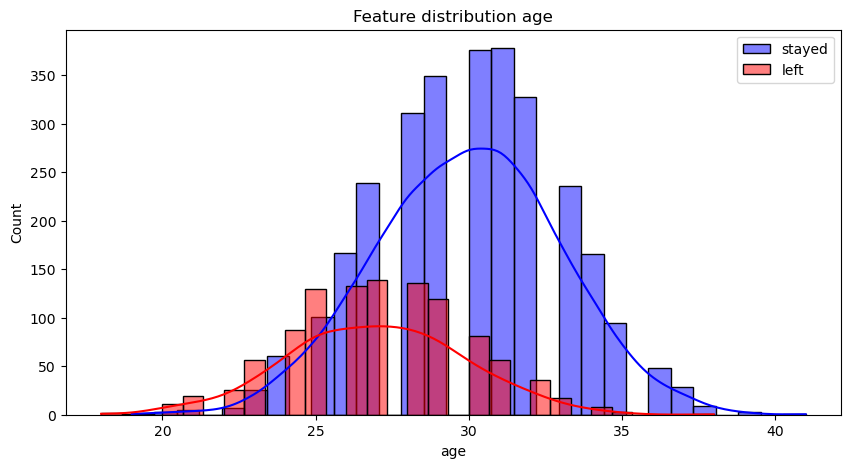

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


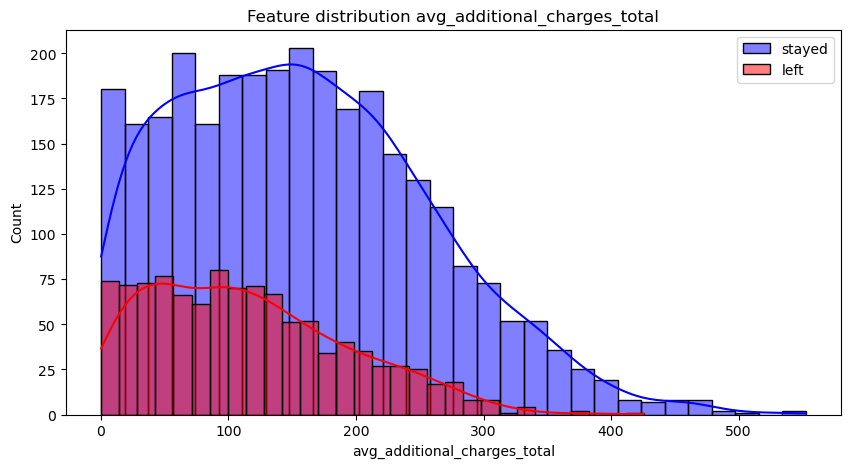

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


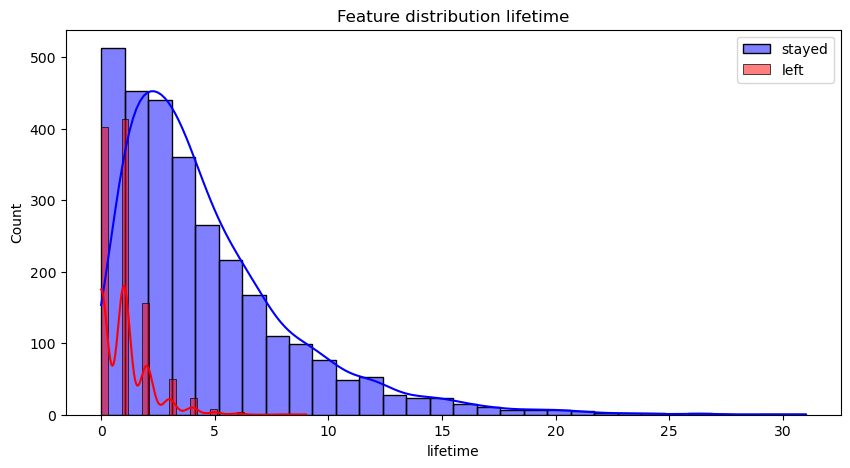

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


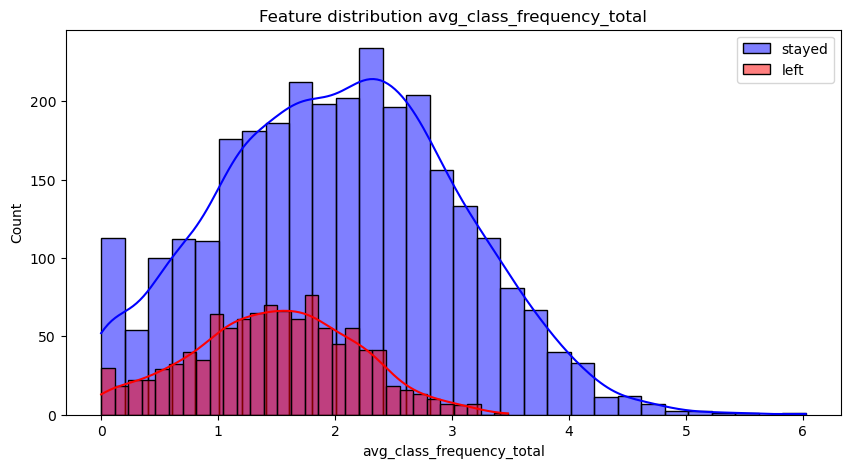

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


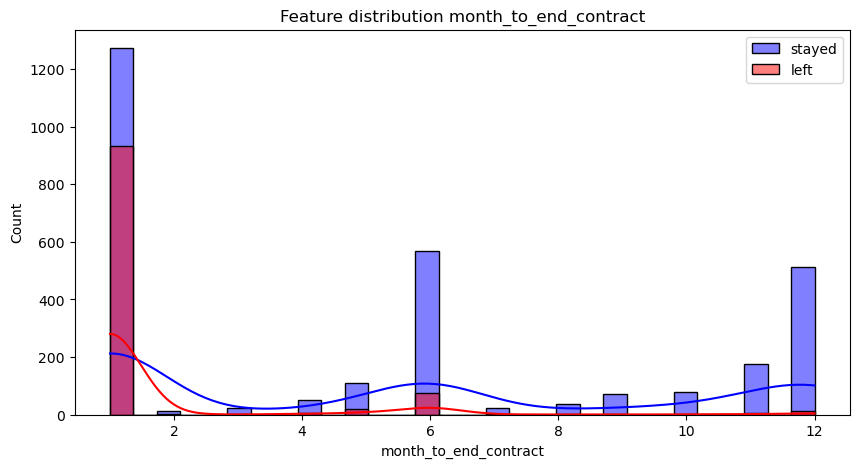

In [10]:
# Características para visualização 
features = ['age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'month_to_end_contract']

# Histograma para cada característica 
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[df['churn'] == 0][feature], kde=True, color='blue', label='stayed', bins=30)
    sns.histplot(df[df['churn'] == 1][feature], kde=True, color='red', label='left', bins=30)
    plt.title(f'Feature distribution {feature}')
    plt.legend()
    plt.show()

# Conclusão sobre os gráficos acima:

Com base nos gráficos, dá pra entender melhor como os clientes se comportam em relação a ficar ou sair do serviço. Aparentemente os clientes mais jovens, que gastam menos e usam o serviço por pouco tempo, têm uma chance maior de cancelar. Por outro lado, os clientes mais velhos, que acabam gastando mais e ficam no serviço por mais tempo, tendem a continuar usando. Com essas informações podemos pensar em estratégias que ajudem a manter os clientes mais novos por mais tempo.

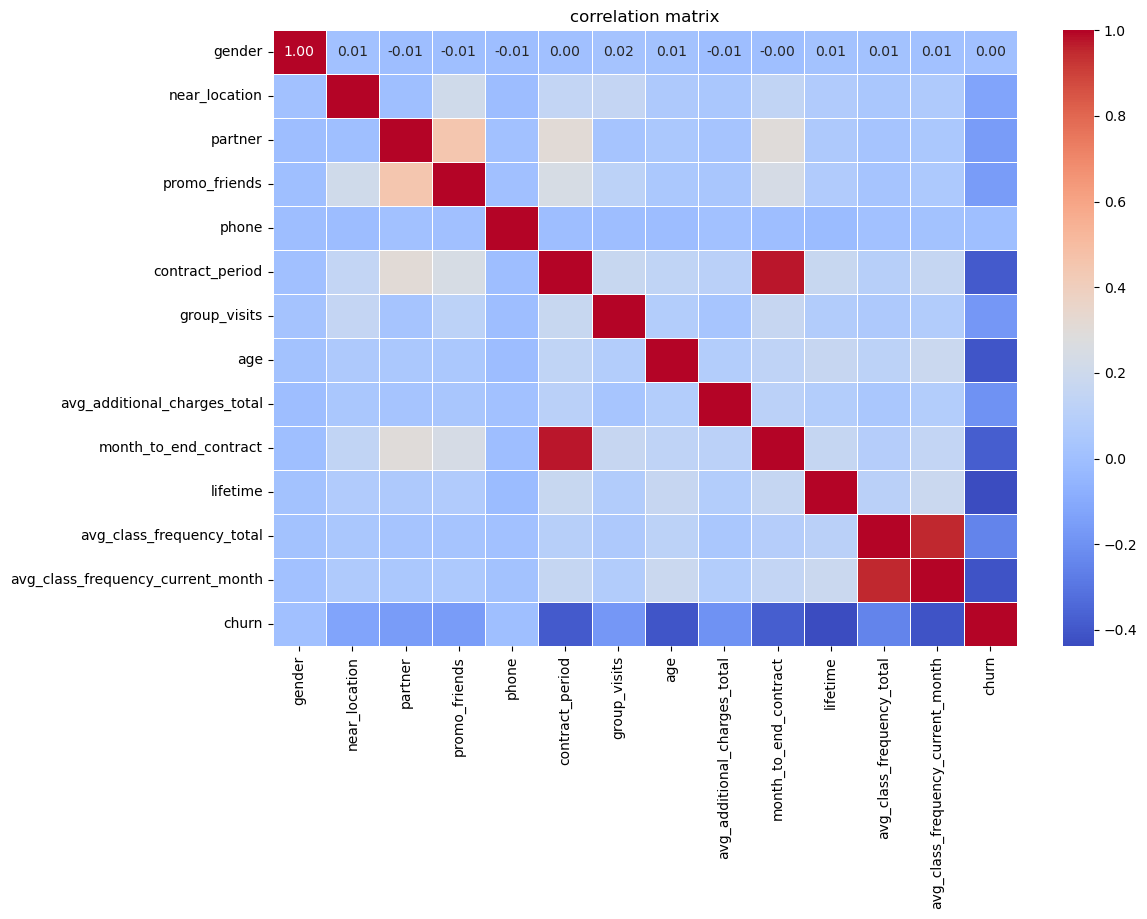

In [11]:
# Matriz de correlação 
correlation_matrix = df.corr()

# Exibir a matriz de correlação 
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('correlation matrix')
plt.show()

# Conclusão sobre a matriz de correlação:

As variáveis mais influentes para a retenção de clientes parecem ser o período de contrato, o tempo de vida do cliente, a frequência de uso recente e os gastos adicionais. Estratégias para aumentar a retenção podem se concentrar em incentivar contratos mais longos e promover serviços adicionais.

# Passo 3. Construa um modelo para predizer a rotatividade de clientes

In [12]:
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# definindo o algoritmo do modelo 
model = LogisticRegression(random_state=42, max_iter=1000)
# Treinando o modelo de Regressão Logística 
model.fit(X_train, y_train)
# previsão binária 
predictions_lr = model.predict(X_test)

# imprimindo as métricas estudadas para a previsão resultante 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions_lr)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions_lr)))
print('Sensitivity: {:.2f}'.format(recall_score(y_test, predictions_lr)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_lr)))

Accuracy: 0.92
Precision: 0.87
Sensitivity: 0.78
F1: 0.83


In [14]:
# Treinando o modelo de Floresta Aleatória 
rf = RandomForestClassifier(random_state=42)
# Treinando o modelo de floresta aleatória 
rf.fit(X_train, y_train)
# previsão 
predictions_rf = rf.predict(X_test)

# imprimindo as métricas estudadas para a previsão resultante 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions_rf)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions_rf)))
print('Sensitivity: {:.2f}'.format(recall_score(y_test, predictions_rf)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_rf)))

Accuracy: 0.91
Precision: 0.85
Sensitivity: 0.78
F1: 0.81


# Passo 4. Crie agrupamentos de clientes


In [15]:
# Selecionando as colunas de características, excluindo a variável de rotatividade

X = df.drop('churn', axis=1)

# Padronizando os dados 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

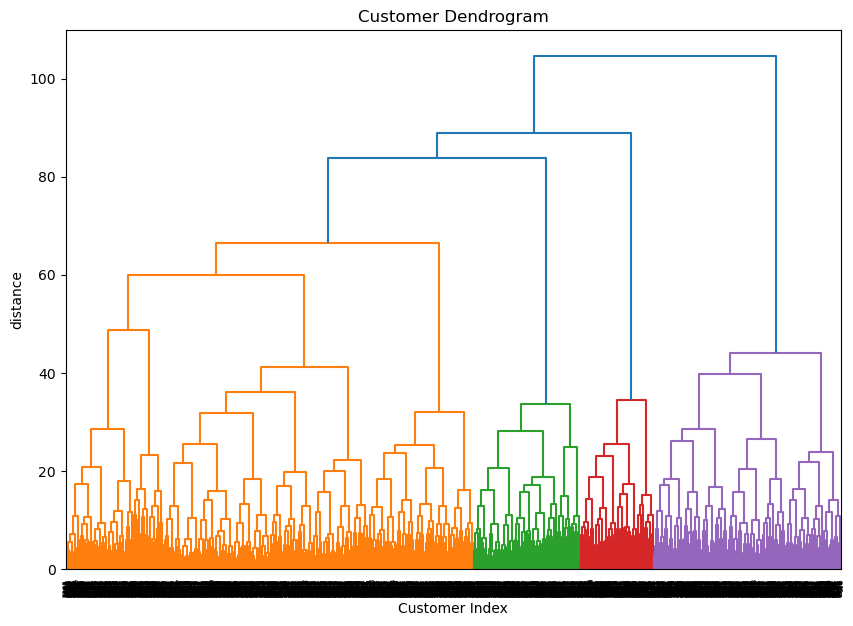

In [16]:
# Calculando a matriz de distâncias 
linked = sch.linkage(X_scaled, method='ward')

# Construa o dendrograma 
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Customer Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('distance')
plt.show()

Olhe para os valores médios das características para agrupamentos. Nada chama a sua atenção?
Faça distribuições de características para os agrupamentos. Você notou alguma coisa?

In [17]:
# Defina o número de agrupamentos 
n_clusters = 5

# Criando o modelo K-Means e ajuste aos dados 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionando os rótulos dos agrupamentos ao DataFrame 
df['cluster'] = clusters

k:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
# Calculando os valores médios para cada agrupamento 
cluster_means = df.groupby('cluster').mean()
print(cluster_means)

           gender  near_location   partner  promo_friends  phone  \
cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         contract_period  group_visits        age  \
cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         avg_additional_charges_total  month_to_end_contract  lifetime  \
cluster                                                                  
0  

Obs:

Olhando para os diferentes grupos de clientes, ficou claro que há padrões bem definidos quando se trata de quem fica e quem sai. O Cluster 2 é praticamente o time dos clientes fiéis, com uma taxa de rotatividade super baixa (2,2%). Eles têm contratos mais longos, usam bastante os serviços e estão bem engajados. Por outro lado, o Cluster 3 é o oposto com uma média de quase 60% deles acabam saindo, já eles têm contratos curtos, usam menos o serviço e não se envolvem tanto, seja trazendo amigos ou participando de atividades com parceiros.

Os Clusters 0 e 4 ficam no meio-termo, com uma rotatividade moderada e uma mistura de engajamento e duração dos contratos. O Cluster 1, apesar de ter contratos mais curtos, se destaca pela lealdade, provavelmente porque esses clientes estão super envolvidos nas atividades.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


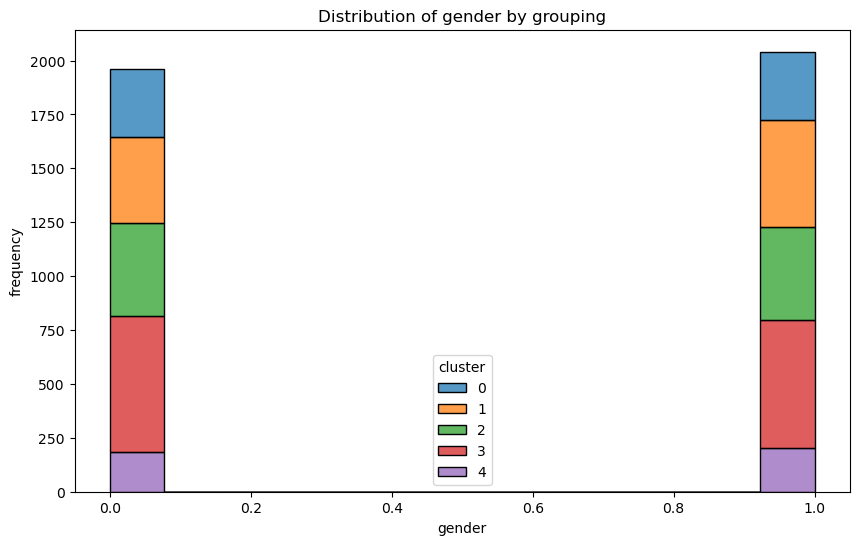

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


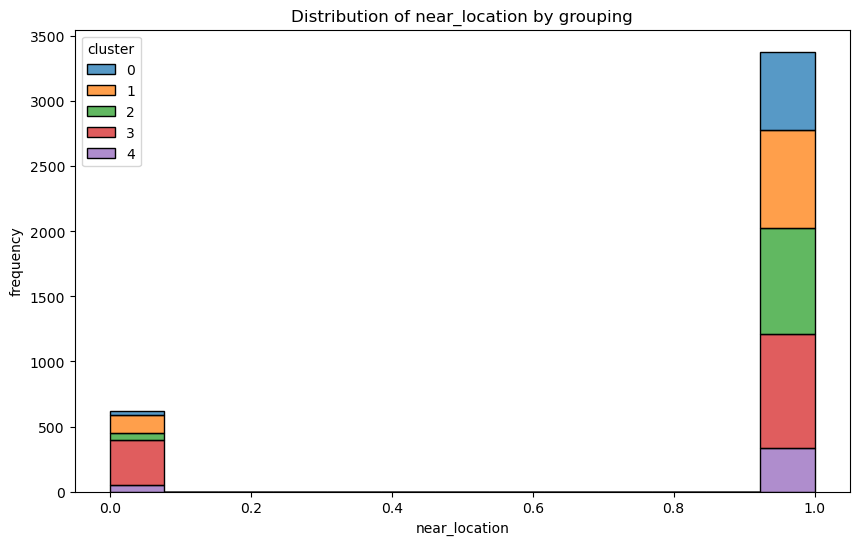

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


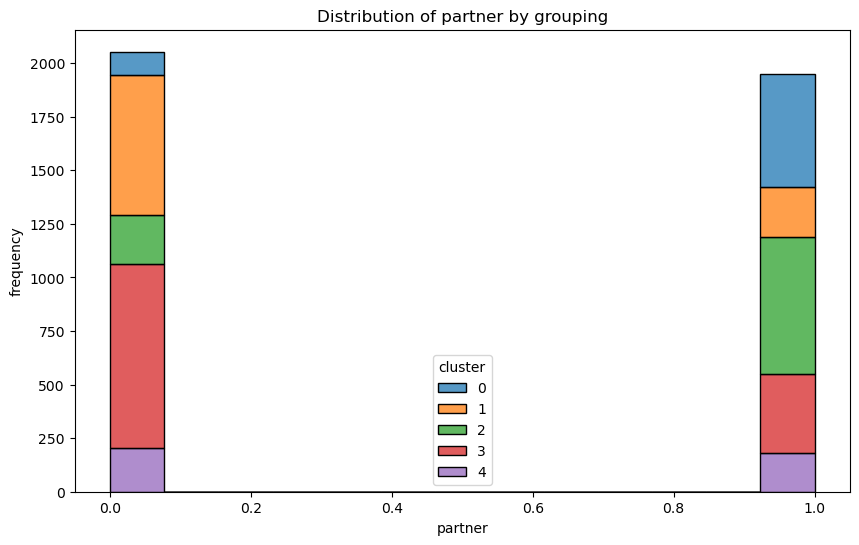

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


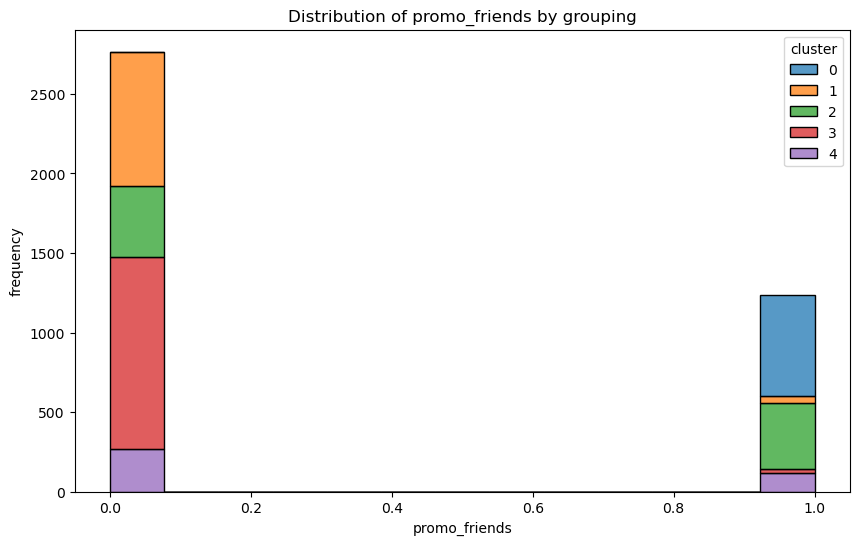

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


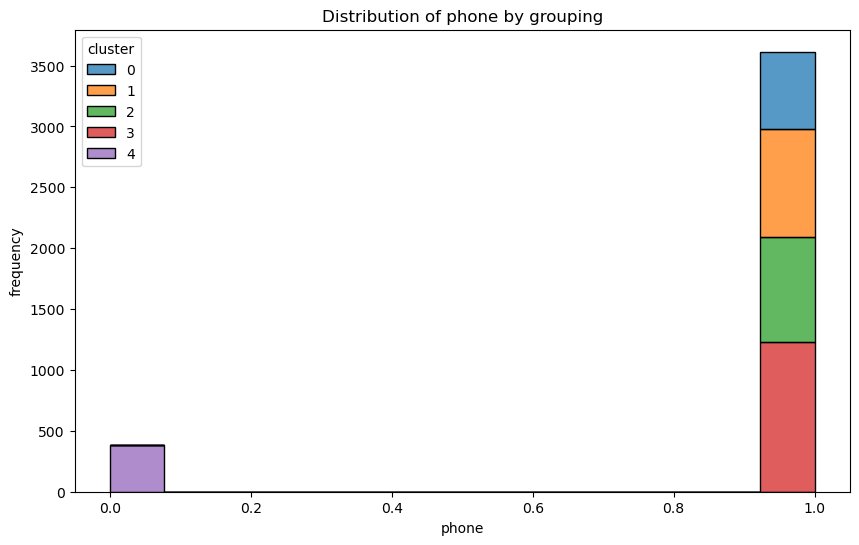

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


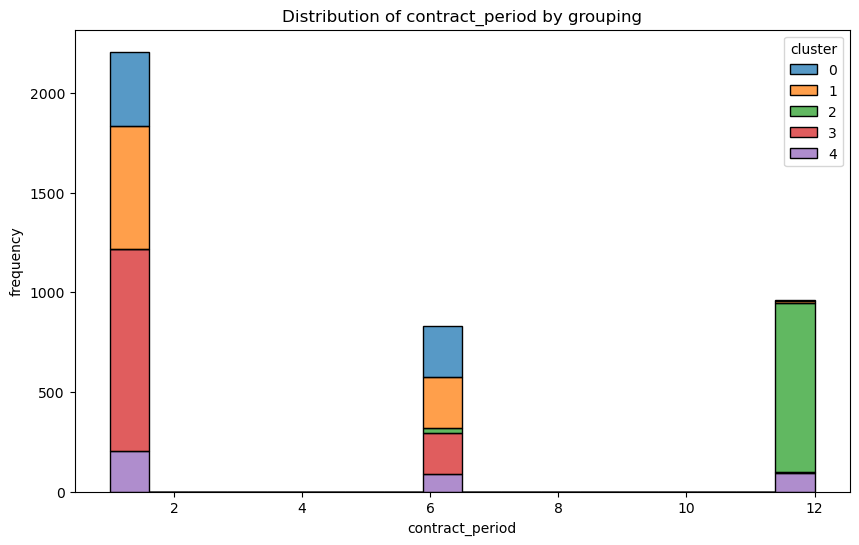

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


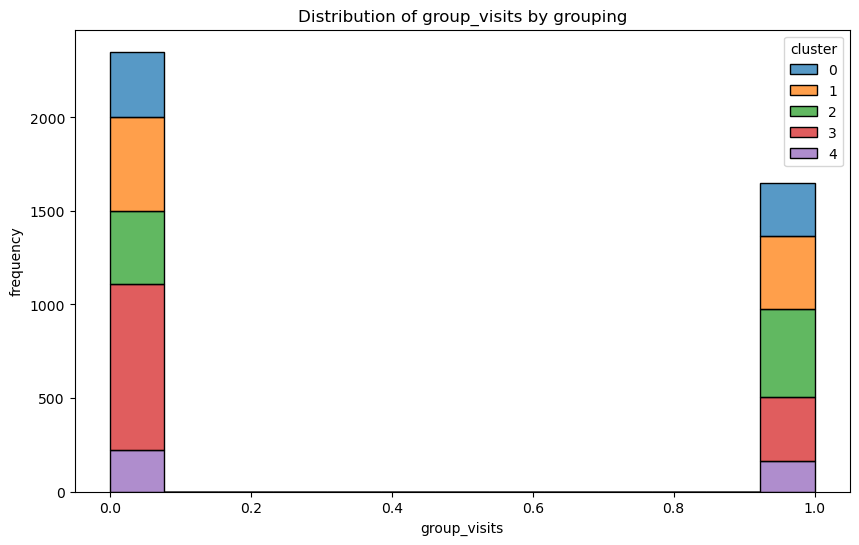

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


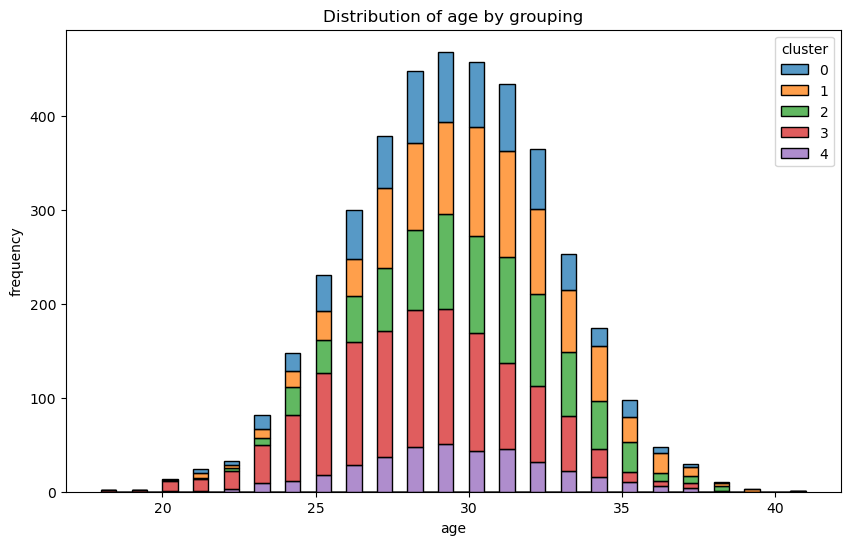

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


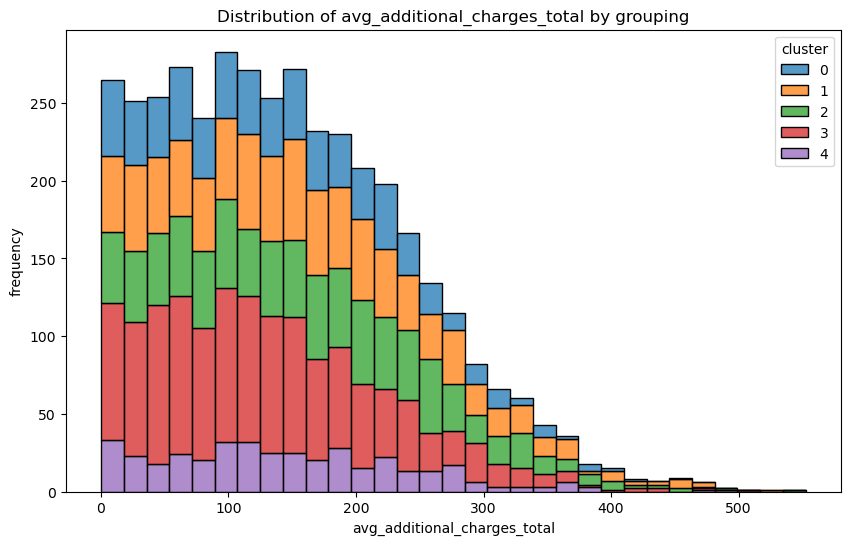

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


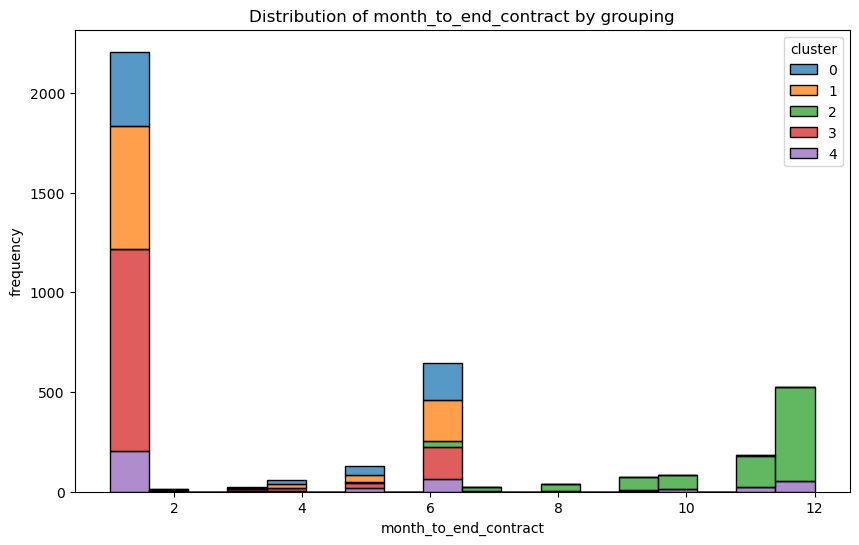

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


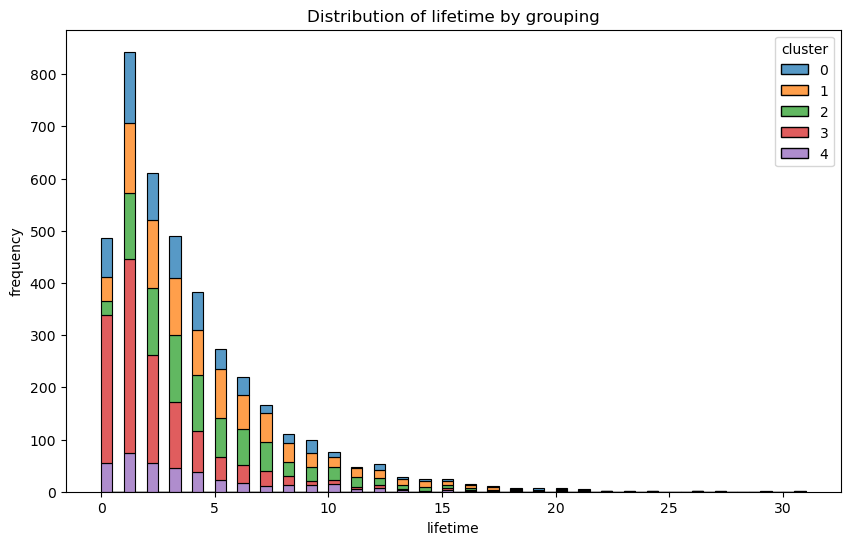

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


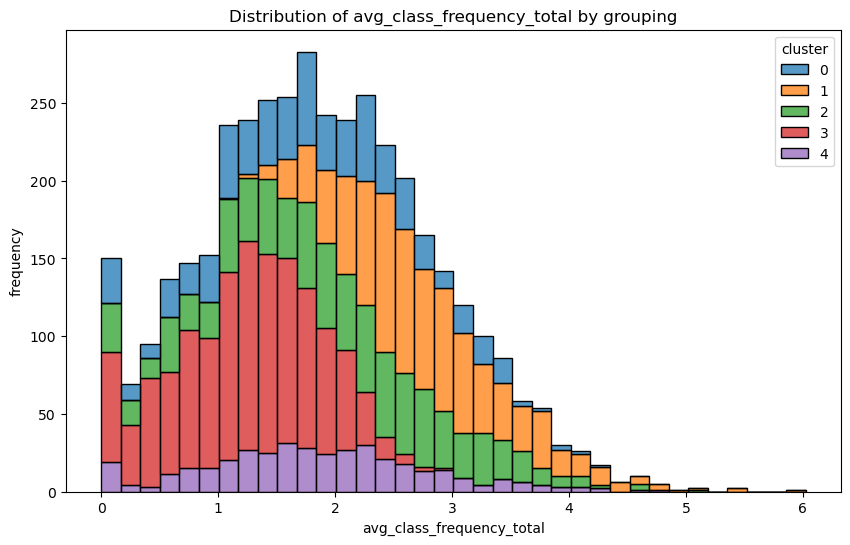

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


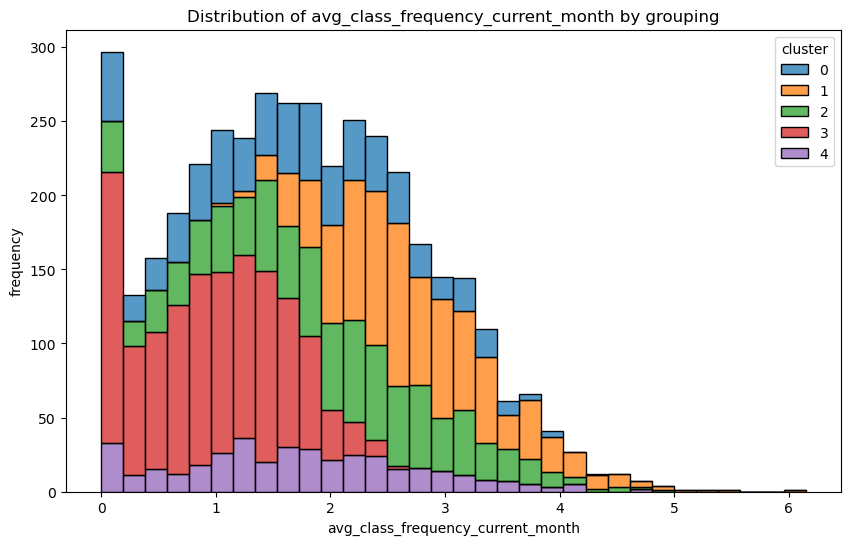

In [19]:
# Definindo os gráficos de distribuição para uma característica específica
for feature in X.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='cluster', multiple='stack', palette='tab10')
    plt.title(f'Distribution of {feature} by grouping')
    plt.xlabel(feature)
    plt.ylabel('frequency')
    plt.show()

Calcule a taxa de rotatividade para cada agrupamento (use o método groupby()). Eles diferem em termos de taxa de rotatividade? Quais agrupamentos são propensos a sair, e quais são leais?

In [20]:
# Calculando a taxa de rotatividade por agrupamento 
churn_rate = df.groupby('cluster')['churn'].mean()
print('Turnover Rate by Group:')
print(churn_rate)

Turnover Rate by Group:
cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: churn, dtype: float64


Obs:

Clusters 1 e 2 são grupos leais com baixas taxas de rotatividade, esses dois grupos podem ser considerados estáveis.

Clusters 0 e 4 têm taxas de rotatividade moderadas, então podemos fazer campanhas e achar alguma forma de fidelizar e reduzir o risco de saída.

Cluster 3 é o grupo mais propenso a sair, para este grupo temos que procurar formas de fidelizar eles, com promoções especiais, um atendimento personalizado e receber um feedback para entender a causa da rotatividade.

Então se focarmos em estratégias que aumentem o uso dos serviços e prolonguem os contratos pode ser a melhor forma de manter mais gente por perto, especialmente aqueles grupos que não estão tão firmes e propensos a sair.

# Passo 5. Chegue a conclusões e faça recomendações básicas sobre trabalhar com clientes


# Conclusões:

Perfil dos nossos clientes: Podemos concluir que os clientes mais jovens com contratos curtos e menor engajamento tendem a cancelar o serviço mais cedo.
Por outro lado clientes mais velhos que utilizam os serviços com mais frequência e têm contratos mais longos, tendem a permanecer por mais tempo.

Cluster e retençaõ dos clientes: O cluster 2 é composto por clientes fiéis, com uma taxa de rotatividade baixa, esses clientes são altamente engajados e têm contratos mais longos.
O cluster 3 apresenta a maior taxa de rotatividade, os clientes nesse grupo tendem a ter contratos curtos, baixo engajamento e menor uso dos serviços.
Os clusters 0 e 4 têm taxas de rotatividade moderadas, indicando que esses grupos estão em um ponto intermediário em termos de fidelidade.
O cluster 1 também demonstra fidelidade, apesar de ter contratos mais curtos, muito provave que seja por conta do alto envolvimento nas atividades.

Serviços: Clientes que utilizam os serviços com maior frequência tendem a ficar mais tempo, isso nós indica que o engajamento regular é um forte indicador de retenção.

Fim de contrato: Próximo ao término do contrato a probabilidade de saída aumenta significativamente, especialmente nos primeiros dois meses antes do fim. (Esse período deve ser foco de estratégias de retenção para não perdemos o cliente e manter ele leal aos nossos serviços.)


# Recomendações:

Foco em contratos mais longos: Incentivar a assinatura de contratos mais longos pode ser uma estratégia eficaz para aumentar a retenção principalmente para os clienters que já tem um certo nível de engajamento com nossos serviços.

Promoções: Para clientes nos clusters mais propensos a sair como o Cluster 3 podemos fazer campanhas de fidelização, promoções especiais, atendimento personalizado e receber um feedback para entender a causa da rotatividade.

Engajamento: Desenvolver programas que impulssione o uso dos serviços e ajuda a fidelizar os clientes, oferta de aulas adicionais e eventos especiais também podem nos ajudar a manter os clientes que tem um certo nível de frequencia mais incentivado e ativo.

Ofertas para renovação: ofertas de renovação com desconto ou uma inclusão a programas especiais por determinado período pode ajudar a reduzir as saídas nesse período tão crítico para nós.

# Conclusão 

Após analisar os dados, dá pra ver que alguns padrões e características que têm um impacto direto em quem se mantem e quem deixa os serviços. Quando analisamos os clusters, ficou claro que alguns grupos têm uma chance maior de cancelar o serviço em comparação com outros. Por exemplo, o Cluster 3 tem uma taxa de rotatividade bem alta, quase 60%, isso provavelmente acontece porque essas pessoas visitam menos o serviço e têm contratos mais curtos, por outro lado, o Cluster 2 é quase o oposto só 2,2% deles saem. Esses clientes tendem a ser mais fiéis, talvez porque têm contratos mais longos e participam mais das atividades em grupo, também indentifiquei que clientes com a média de idade de 28 a 30 anos tendem a ficar por mais tempo se comparado com clientes mais novos.

Também deu pra perceber que os clientes que usam o serviço com mais frequência tendem a ficar mais tempo. Isso mostra que quanto mais ativo o cliente, maior a chance dele continuar por mais tempo.
Outra coisa que chamou atenção foi que, perto do fim do contrato, muitos clientes decidem sair, o que torna esse período um momento crítico pra pensar em estratégias de retenção.